In [1]:
import torch
from xopt import Xopt, Evaluator
from xopt.generators.bayesian import BayesianExplorationGenerator
from xopt.resources.test_functions.tnk import evaluate_TNK, vocs

evaluator = Evaluator(evaluate_TNK)
generator = BayesianExplorationGenerator(vocs, n_initial=20)
print(vocs)
xopt = Xopt(generator, evaluator, vocs)
xopt.step()

for i in range(50):
    print(f'step {i}')
    xopt.step()

variables={'x1': [0.0, 3.14159], 'x2': [0.0, 3.14159]} constraints={'c1': ['GREATER_THAN', 0.0], 'c2': ['LESS_THAN', 0.5]} objectives={'y1': 'MINIMIZE', 'y2': 'MINIMIZE'} constants={'a': 'dummy_constant'} linked_variables=None
step 0
step 1
step 2
step 3
step 4
step 5
step 6
step 7
step 8
step 9
step 10
step 11
step 12
step 13
step 14
step 15
step 16
step 17
step 18
step 19
step 20
step 21
step 22
step 23
step 24
step 25
step 26
step 27
step 28
step 29
step 30
step 31
step 32
step 33
step 34
step 35
step 36
step 37
step 38
step 39
step 40
step 41
step 42
step 43
step 44
step 45
step 46
step 47
step 48
step 49


In [2]:
print(xopt.history)

          x1        x2        y1        y2         c1        c2 some_array  \
0   1.111382  2.702997  1.111382  2.702997   7.441450  5.226984  [1, 2, 3]   
1   3.138325  0.206390  3.138325  0.206390   8.841987  7.046967  [1, 2, 3]   
2   2.271750  0.550403  2.271750  0.550403   4.542692  3.141639  [1, 2, 3]   
3   0.945522  2.937990  0.945522  2.937990   8.499187  6.142285  [1, 2, 3]   
4   2.052557  1.151385  2.052557  1.151385   4.570648  2.834735  [1, 2, 3]   
..       ...       ...       ...       ...        ...       ...        ...   
65  1.151428  0.775079  1.151428  0.775079   1.026384  0.500027  [1, 2, 3]   
66  0.943158  0.376991  0.943158  0.376991  -0.066355  0.211521  [1, 2, 3]   
67  0.941151  1.052583  0.941151  1.052583   0.931013  0.499962  [1, 2, 3]   
68  0.043081  0.491392  0.043081  0.491392  -0.773758  0.208849  [1, 2, 3]   
69  3.063497  1.764158  3.063497  1.764158  11.545718  8.169615  [1, 2, 3]   

    done  
0   True  
1   True  
2   True  
3   True  
4   True

<AxesSubplot:xlabel='x1'>

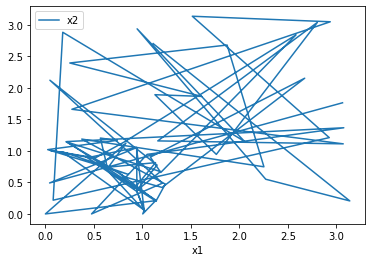

In [3]:
# plot results
xopt.history.plot("x1","x2")

C:\ProgramData\Miniconda3\envs\xopt\lib\site-packages\torch\functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ..\aten\src\ATen\native\TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


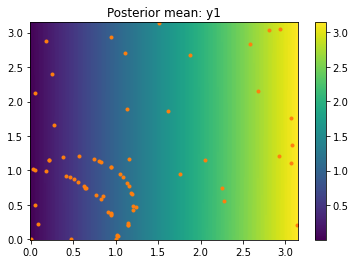

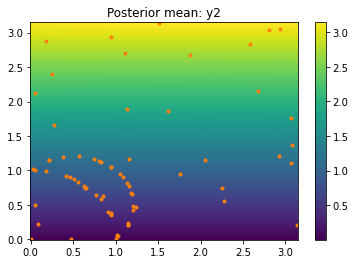

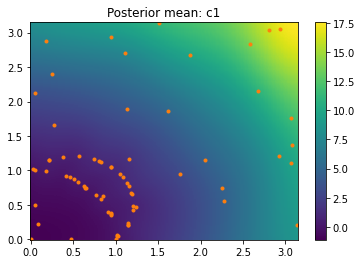

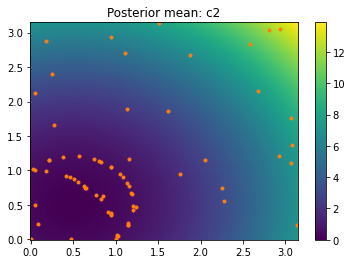

In [4]:
from matplotlib import pyplot as plt# plot model predictions
bounds = generator.get_bounds()
model = generator.get_model(xopt.history)
history = xopt.history

# create mesh
n = 200
x = torch.linspace(*bounds.T[0],n)
y = torch.linspace(*bounds.T[1],n)
xx,yy = torch.meshgrid(x,y)
pts = torch.hstack([ele.reshape(-1,1) for ele in (xx,yy)]).double()

outputs = list(vocs.objectives.keys()) + list(vocs.constraints.keys())
with torch.no_grad():
    post = model.posterior(pts)

    mean = post.mean
    for i in range(mean.shape[-1]):
        fig,ax = plt.subplots()
        ax.plot(*history[["x1","x2"]].to_numpy().T,'.C1')
        c = ax.pcolor(xx, yy, mean[:, i].reshape(n,n))
        fig.colorbar(c)
        ax.set_title(f'Posterior mean: {outputs[i]}')


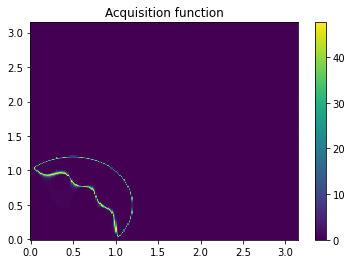

In [5]:
with torch.no_grad():
    acq_pts = pts.unsqueeze(1)
    acq = generator.get_acquisition(model)(acq_pts)

    fig, ax = plt.subplots()
    c = ax.pcolor(xx,yy,acq.reshape(n,n))
    fig.colorbar(c)
    ax.set_title('Acquisition function')